In [2]:
def Str_To_Arr(s):
    arr=[]
    for k in range(len(s)):
        if s[k]==' ':
            arr.append(26)
        else:
            arr.append(ord(s[k])-ord('a'))
    return arr
def Arr_To_Str(arr):
    s=''
    for k in range(len(arr)):
        if arr[k]==26:
            s+=' '
        else:
            s+=chr(int(arr[k])+ord('a'))
    return s
def Get_Rand_key(s):
    key=[]
    for k in range(len(s)):
        a=randint(0,26)
        while a==k or a in key:
            a=randint(0,26)
        key.append(a)
    return key

Сообщение = christmas is one of the most popular holidays on the planet it seems strange but not everybody celebrate such a great holiday it depends on the religion and the culture of people so who does not celebrate this holiday firstly it s a religious holiday christians commemorate the birth of christ so people who are neither christian nor believers don t have holiday mood on this day besides other people refuse to take part in christmas because they consider that this holiday became too commercial it s true that in december stores are full of christmas goods and people spend a lot of money to have a good time with their friends family and relatives most of them are ready to waste money for small useless presents it is clear that they celebrate christmas because it s a family party and a great opportunity to be together nevertheless this cheerful and commercial side of this holiday attracts some countries for example china they have been celebrating christmas for several years but 

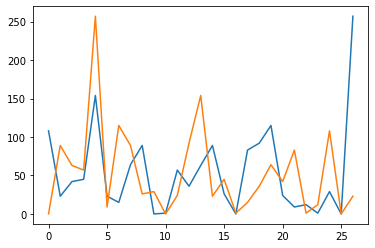

In [41]:
alphabet='abcdefghijklmnopqrstuvwxyz '
with open("Text.txt", "r") as file:
    message=file.read()
file.close()
message=message.lower()
print('Сообщение = '+message)
alphabet_arr=Str_To_Arr(alphabet)
#Генерация ключа
key=Get_Rand_key(alphabet_arr)
print('Алфа = '+alphabet)
print('Ключ = '+Arr_To_Str(key))
#Шифрование
message_arr=Str_To_Arr(message)
ciphertext=[]
for k in range(len(message)):
    ciphertext.append(key[message_arr[k]])
analysis(alphabet,message_arr)
analysis(alphabet,ciphertext)
encrypted=Arr_To_Str(ciphertext)
print('Шифротекст = '+encrypted)
#Дешифрование
plaintext=[]
encrypted_arr=Str_To_Arr(encrypted)
for k in range(len(encrypted)):
    for i in range(len(key)):
        if key[i]==encrypted_arr[k]:
            plaintext.append(alphabet_arr[i])
            break
decrypted=Arr_To_Str(plaintext)
print('Результат дешифрования = '+Arr_To_Str(plaintext))

In [34]:
import matplotlib.pyplot as plt
def analysis(alpha,text):
    freq=[]
    x=[]
    for i in range(len(alpha)):
        freq.append(0)
        x.append(i)
    for k in range(len(text)):
        freq[text[k]]+=1
    for i in range(len(alpha)):
        print(alpha[i]+' '+str(freq[i]))
    plt.plot(x,freq)
    pass

In [28]:
analysis(alphabet,encrypted_arr)

NameError: name 'encrypted_arr' is not defined

In [4]:
import sympy
def power_mod(base, exponent, n):
    base = sympy.Integer(base)
    exponent = sympy.Integer(exponent)
    n = sympy.Integer(n)
    x = sympy.Integer(1)
    e = exponent
    c = sympy.Mod(base, n)
    vals = [c]
    x += 1
    while x <= exponent:
        c = sympy.Mod(c**2, n)
        vals.append(c)
        x *= 2

    x /= 2
    answer = sympy.Integer(1)
    while len(vals) > 0:
        nextv = vals.pop()
        if x <= e:
            answer = sympy.Mod(nextv*answer, n)
            e -= x
            if e == 0:
                break
        x /= 2
    return answer
def Solovay_Strassen_test(n,k):
    for i in range(1,k):
        a=randint(2,n-1)
        if gcd(a,n)>1:
            return false
        else:
            symb=kronecker_symbol(a,n)
            if symb<0:
                symb+=n
            if power_mod(a,(n-1)/2,n)!=symb:
                return false
    return true

Сообщение = christmas is one of the most popular holidays on the planet it seems strange but not everybody celebrate such a great holiday it depends on the religion and the culture of people so who does not celebrate this holiday firstly it s a religious holiday christians commemorate the birth of christ so people who are neither christian nor believers don t have holiday mood on this day besides other people refuse to take part in christmas because they consider that this holiday became too commercial it s true that in december stores are full of christmas goods and people spend a lot of money to have a good time with their friends family and relatives most of them are ready to waste money for small useless presents it is clear that they celebrate christmas because it s a family party and a great opportunity to be together nevertheless this cheerful and commercial side of this holiday attracts some countries for example china they have been celebrating christmas for several years but 

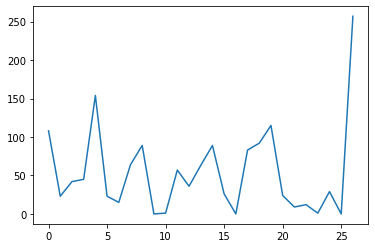

In [39]:
#Усовершенствованный вариант
alphabet='abcdefghijklmnopqrstuvwxyz '
with open("Text.txt", "r") as file:
    message=file.read()
file.close()
message=message.lower()
print('Сообщение = '+message)
alphabet_arr=Str_To_Arr(alphabet)
#Генерация ключа
#Ключ замены
key=Get_Rand_key(alphabet_arr)
print('Алфавит = '+alphabet)
print('Ключ_замены = '+Arr_To_Str(key))
key_vig='private'
#Генерация открытого и закрытого ключей
while True:
    n=randint(100000,300000)
    n+=(n+1)%2
    if Solovay_Strassen_test(n,20):
        break;
while True:
    e=randint(10,n-2)
    if gcd(e,n-1)==1:
        break;
d=inverse_mod(e,n-1)
shift=randint(2,7)
print('n = ',n,' e = ',e,' d = ',d,' shift = ',shift)
#Шифрование
message_arr=Str_To_Arr(message)
print('Частоты букв открытого текста')
analysis(alphabet,message_arr)
ciphertext=[]
for k in range(len(message)):
    ciphertext.append(key[message_arr[k]])
    ciphertext[k]=(ciphertext[k]+ord(key_vig[k%len(key_vig)])-ord('a'))%27
    ciphertext[k]=power_mod(ciphertext[k]+shift,e,n)
f=open('encrypted.txt','w')
for k in range(len(ciphertext)):
    f.write(''.join(str(ciphertext[k])))
    f.write(',')
f.close()
f=open('encrypted.txt','r')
ecnrypted=[]
encrypted=f.read().split(',')
del encrypted[-1]
f.close()
#Дешифрование
plaintext=[]
for k in range(len(encrypted)):
    encrypted[k]=int(encrypted[k])
    temp=encrypted[k]
    temp=power_mod(temp,d,n)-shift
    temp=(temp-ord(key_vig[k%len(key_vig)])+ord('a')+27)%27
    for i in range(len(key)):
        if key[i]==temp:
            plaintext.append(alphabet_arr[i])
            break
decrypted=Arr_To_Str(plaintext)
print('Результат дешифрования = '+Arr_To_Str(plaintext))

Сообщение = christmas is one of the most popular holidays on the planet it seems strange but not everybody celebrate such a great holiday it depends on the religion and the culture of people so who does not celebrate this holiday firstly it s a religious holiday christians commemorate the birth of christ so people who are neither christian nor believers don t have holiday mood on this day besides other people refuse to take part in christmas because they consider that this holiday became too commercial it s true that in december stores are full of christmas goods and people spend a lot of money to have a good time with their friends family and relatives most of them are ready to waste money for small useless presents it is clear that they celebrate christmas because it s a family party and a great opportunity to be together nevertheless this cheerful and commercial side of this holiday attracts some countries for example china they have been celebrating christmas for several years but 

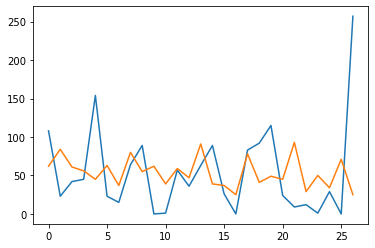

In [44]:
#Усовершенствованный вариант
alphabet='abcdefghijklmnopqrstuvwxyz '
with open("Text.txt", "r") as file:
    message=file.read()
file.close()
message=message.lower()
print('Сообщение = '+message)
alphabet_arr=Str_To_Arr(alphabet)
#Генерация ключа
#Ключ замены
key=Get_Rand_key(alphabet_arr)
print('Алфавит = '+alphabet)
print('Ключ_замены = '+Arr_To_Str(key))
key_vig='private'
#Генерация открытого и закрытого ключей
while True:
    n=randint(100000,300000)
    n+=(n+1)%2
    if Solovay_Strassen_test(n,20):
        break;
while True:
    e=randint(10,n-2)
    if gcd(e,n-1)==1:
        break;
d=inverse_mod(e,n-1)
shift=randint(2,7)
print('n = ',n,' e = ',e,' d = ',d,' shift = ',shift)
#Шифрование
message_arr=Str_To_Arr(message)
print('Частоты букв открытого текста')
analysis(alphabet,message_arr)
ciphertext=[]
for k in range(len(message)):
    ciphertext.append(key[message_arr[k]])
    ciphertext[k]=(ciphertext[k]+ord(key_vig[k%len(key_vig)])-ord('a'))%27
print('Частоты букв после Виженера')
analysis(alphabet,ciphertext)
for k in range(len(message)):
    ciphertext[k]=power_mod(ciphertext[k]+shift,e,n)
ciphertext.reverse()
f=open('encrypted.txt','w')
for k in range(len(ciphertext)):
    f.write(''.join(str(ciphertext[k])))
    f.write(',')
f.close()
f=open('encrypted.txt','r')
ecnrypted=[]
encrypted=f.read().split(',')
del encrypted[-1]
f.close()
#Дешифрование
plaintext=[]
for k in range(len(encrypted)):
    encrypted[k]=int(encrypted[k])
    temp=encrypted[k]
    temp=power_mod(temp,d,n)-shift
    temp=(temp-ord(key_vig[k%len(key_vig)])+ord('a')+27)%27
    for i in range(len(key)):
        if key[i]==temp:
            plaintext.append(alphabet_arr[i])
            break
decrypted=Arr_To_Str(plaintext)
print('Результат дешифрования = '+Arr_To_Str(plaintext))

a 108
b 23
c 42
d 45
e 154
f 23
g 15
h 64
i 89
j 0
k 1
l 57
m 36
n 63
o 89
p 26
q 0
r 83
s 92
t 115
u 24
v 9
w 12
x 1
y 29
z 0
  257


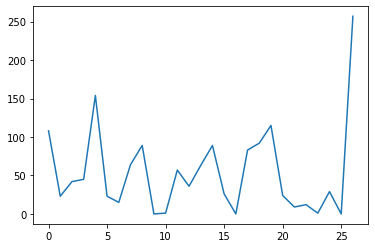

In [35]:
analysis(alphabet,message_arr)

Сообщение = christmas is one of the most popular holidays on the planet it seems strange but not everybody celebrate such a great holiday it depends on the religion and the culture of people so who does not celebrate this holiday firstly it s a religious holiday christians commemorate the birth of christ so people who are neither christian nor believers don t have holiday mood on this day besides other people refuse to take part in christmas because they consider that this holiday became too commercial it s true that in december stores are full of christmas goods and people spend a lot of money to have a good time with their friends family and relatives most of them are ready to waste money for small useless presents it is clear that they celebrate christmas because it s a family party and a great opportunity to be together nevertheless this cheerful and commercial side of this holiday attracts some countries for example china they have been celebrating christmas for several years but 

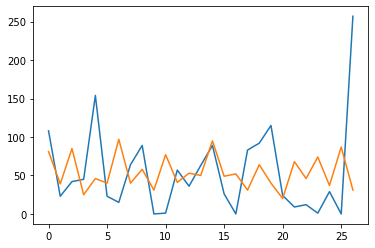

In [46]:
#Усовершенствованный вариант
alphabet='abcdefghijklmnopqrstuvwxyz '
with open("Text.txt", "r") as file:
    message=file.read()
file.close()
message=message.lower()
print('Сообщение = '+message)
alphabet_arr=Str_To_Arr(alphabet)
#Генерация ключа
#Ключ замены
key=Get_Rand_key(alphabet_arr)
print('Алфавит = '+alphabet)
print('Ключ_замены = '+Arr_To_Str(key))
key_vig='private'
#Генерация открытого и закрытого ключей
while True:
    n=randint(100000,300000)
    n+=(n+1)%2
    if Solovay_Strassen_test(n,20):
        break;
while True:
    e=randint(10,n-2)
    if gcd(e,n-1)==1:
        break;
d=inverse_mod(e,n-1)
shift=randint(2,7)
print('n = ',n,' e = ',e,' d = ',d,' shift = ',shift)
#Шифрование
message_arr=Str_To_Arr(message)
print('Частоты букв открытого текста')
analysis(alphabet,message_arr)
ciphertext=[]
for k in range(len(message)):
    ciphertext.append(key[message_arr[k]])
    ciphertext[k]=(ciphertext[k]+ord(key_vig[k%len(key_vig)])-ord('a'))%27
print('Частоты букв после Виженера')
analysis(alphabet,ciphertext)
for k in range(len(message)):
    ciphertext[k]=power_mod(ciphertext[k]+shift,e,n)
ciphertext.reverse()
f=open('encrypted.txt','w')
for k in range(len(ciphertext)):
    f.write(''.join(str(ciphertext[k])))
    f.write(',')
f.close()
f=open('encrypted.txt','r')
ecnrypted=[]
encrypted=f.read().split(',')
del encrypted[-1]
f.close()
#Дешифрование
plaintext=[]
encrypted.reverse()
for k in range(len(encrypted)):
    encrypted[k]=int(encrypted[k])
    temp=encrypted[k]
    temp=power_mod(temp,d,n)-shift
    temp=(temp-ord(key_vig[k%len(key_vig)])+ord('a')+27)%27
    for i in range(len(key)):
        if key[i]==temp:
            plaintext.append(alphabet_arr[i])
            break
decrypted=Arr_To_Str(plaintext)
print('Результат дешифрования = '+Arr_To_Str(plaintext))